In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Load Data and Transfer Label

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train['LeadStatus'] = train['LeadStatus'].replace({"Passed":0, "Flagged":1, "Assign to CS":1})
train = train.drop(train[train['Country'] == 'ERROR'].index)

### Description of Data
1.  Study - A character indicating which of the five studies the data represents.
2.  Country - The country where the assessment was conducted.
3.  PatientID - An identification number given to each unique patient.
4.  SiteID - An identification number given to each unique assessment site.
5.  RaterID - An identification number given to each unique rater.
6.  AssessmentiD - An idenfication number given to each unique assessment conducted.
7.  TxGroup - A string corresponding to the patient’s (randomly) assigned treatment group.
8.  VisitDay - An integer corresponding to the number of days that have passed since the baseline as- sessment.
9.  P1-P7 - The scores corresponding to each of the 7 positive symptoms of the assessment.
10.  N1-N7 - The scores corresponding to each of the 7 negative symptoms of the assessment.
11.  G1-G16  -  The  scores  corresponding  to  each  of  the  16  general  psychopathology  symptoms  of  the assessment.
12.  PANSS_Total - The sum of of the ratings across the 30 PANSS items.
13.  LeadStatus - A string indicating whether the assessment’s audit passed, was flagged, or was assigned to a CS (i.e. clinical specialist)."

### Data Analysis

### Check missing values


In [4]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

LeadStatus      0.0
PANSS_Total     0.0
N3              0.0
N2              0.0
N1              0.0
P7              0.0
P6              0.0
P5              0.0
P4              0.0
P3              0.0
P2              0.0
P1              0.0
VisitDay        0.0
TxGroup         0.0
AssessmentiD    0.0
RaterID         0.0
SiteID          0.0
PatientID       0.0
Country         0.0
N4              0.0
N5              0.0
N6              0.0
G9              0.0
G16             0.0
G15             0.0
G14             0.0
G13             0.0
G12             0.0
G11             0.0
G10             0.0
G8              0.0
N7              0.0
G7              0.0
G6              0.0
G5              0.0
G4              0.0
G3              0.0
G2              0.0
G1              0.0
Study           0.0
dtype: float64

As shown above, no missin values found.

### Check skewness

In [5]:
cols = train.columns.tolist()
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': train[c].nunique(), 'skewness': train[c].value_counts(normalize=True).values[0] * 100} for c in cols[8:38]])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,uniq,skewness
16,G3,6,67.4428
4,P5,7,59.7487
6,P7,7,55.4669
21,G8,7,53.9662
3,P4,7,49.3271
27,G14,7,49.2735
19,G6,7,48.8447
23,G10,7,48.5946
14,G1,7,46.4269
18,G5,7,43.9674


As shown above, there is no extremely inbalanced columns.

### Data Preprocessing

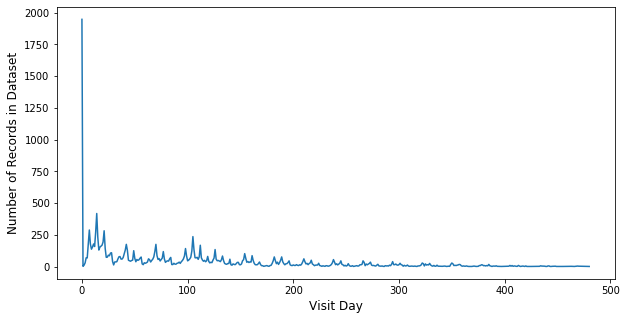

In [8]:
plt.rcParams["figure.figsize"] = (10,5)
visitDay = train['VisitDay'].value_counts().sort_index()
plt.plot(visitDay.index,visitDay.values)
plt.xlabel('Visit Day', fontsize=12)
plt.ylabel('Number of Records in Dataset', fontsize=12)
plt.savefig('plots/VisitDay_distribution.png')
plt.show()

vist day is too discrete, should bin it.

In [7]:
bins = [-1] + list(range(0,481,10))
labels = list(range(49))
train['binnedVisitDay'] = pd.cut(train['VisitDay'], bins=bins, labels=labels)
train

,Study,Country,PatientID,SiteID,RaterID,AssessmentiD,TxGroup,VisitDay,P1,P2,...,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus,binnedVisitDay
0,A,USA,10233,20029,30018,101771,Control,0,6,5,...,1,3,3,1,1,4,2,92,0,0
1,A,USA,10233,20029,30018,102243,Control,4,5,5,...,1,2,3,4,1,3,2,88,0,1
2,A,USA,10233,20029,30018,101978,Control,11,4,4,...,1,3,3,1,1,3,2,82,0,2
3,A,USA,10233,20029,30018,100076,Control,16,4,3,...,1,1,3,1,1,3,1,72,0,2
4,A,USA,10233,20029,30018,101258,Control,32,6,5,...,2,4,4,2,1,4,3,91,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16794,D,China,40085,80001,120001,402184,Treatment,191,1,2,...,3,1,3,2,1,1,1,49,1,20
16795,D,China,40085,80001,120001,400007,Treatment,219,1,3,...,3,1,4,1,1,1,1,49,1,22
16796,D,China,40085,80001,120001,402902,Treatment,250,1,1,...,1,1,4,1,1,1,1,47,1,25
16797,D,China,40085,80001,120001,402232,Treatment,275,1,1,...,1,1,3,1,1,1,1,42,1,28


In [8]:
len(bins)

50

### Data Visualization

### Correlation between features P, N, G

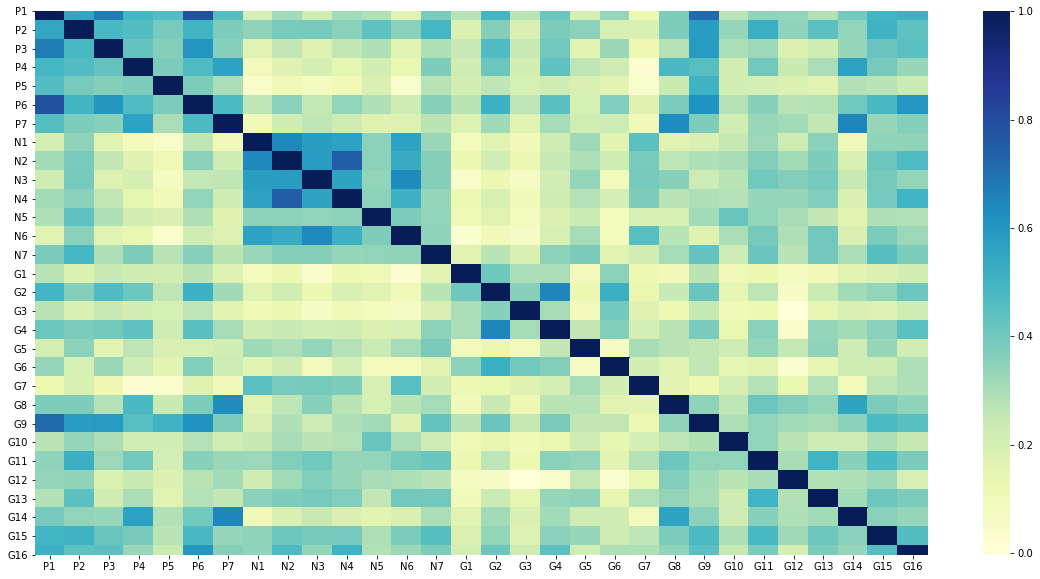

In [9]:
corr = train[cols[8:38]].corr()
# corr.style.background_gradient(cmap='coolwarm').set_precision(2)

plt.figure(figsize = (20,10))
ax = sns.heatmap(corr,cmap="YlGnBu")


### Data Distribution for N, P, G

In [10]:
# Visualization function for feature P,N,G
def feature_distribution_bar(db,feature):
    lead_status = [0,1]
    x0 = train[train['LeadStatus'] == lead_status[0]][feature]
    x1 = train[train['LeadStatus'] == lead_status[1]][feature]
    values = np.sort(train[feature].unique())
    x0 = [sum(x0==i) for i in values]
    x1 = [sum(x1==i) for i in values]
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.6
    ax.bar(values-0.5* bar_width, x0, bar_width, alpha = opacity, color='lightblue',label = lead_status[0])
    ax.bar(values + 0.5 * bar_width, x1, bar_width, alpha = opacity, color='lightgreen',label = lead_status[1])
    ax.set_title(f'Distribution Histogram of {feature}')
    ax.legend(prop = {'size':10})
    ax.set_ylabel('Density')
    ax.set_xlabel('Score')
    return None


# def feature_distribution_hist(db,feature):
#     lead_status = [0,1]
#     x0 = train[train['LeadStatus'] == lead_status[0]][feature]
#     x1 = train[train['LeadStatus'] == lead_status[1]][feature]
#     fig, ax = plt.subplots()
#     ax.hist(x0, density = True, histtype='stepfilled', alpha=0.6, label=lead_status[0], color='lightblue',)
#     ax.hist(x1, density = True, histtype='stepfilled', alpha=0.6, label=lead_status[1], color='lightgreen',)
#     ax.set_title(f'Density Plot with {feature}')
#     ax.legend(prop = {'size':10})
#     ax.set_ylabel('Density')
#     ax.set_xlabel('Score')
#     return None


def freq_polygon(db,feature):
    lead_status = [0,1]
    x0 = train[train['LeadStatus'] == lead_status[0]][feature]
    x1 = train[train['LeadStatus'] == lead_status[1]][feature]
    values = np.sort(train[feature].unique())
    x0 = [np.mean(x0==i) for i in values]
    x1 = [np.mean(x1==i) for i in values]
    fig, ax = plt.subplots()
    ax.plot(values, x0, color='blue',label = lead_status[0])
    ax.plot(values, x1, color='red',label = lead_status[1])
    ax.set_title(f'Density Plot for {feature}')
    ax.legend(prop = {'size':10})
    ax.set_ylabel('Density')
    ax.set_xlabel('Score')
    return None

/Users/lujiankun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
/Users/lujiankun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


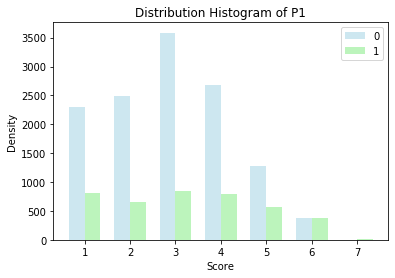

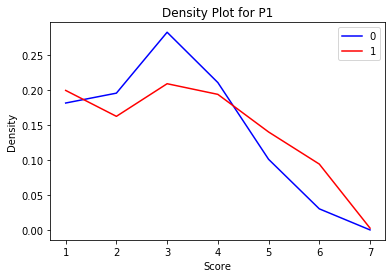

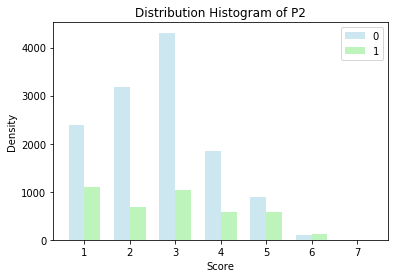

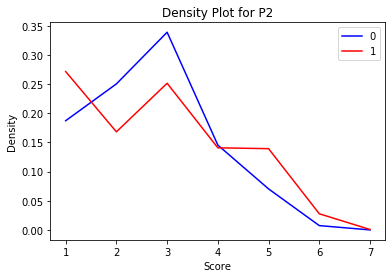

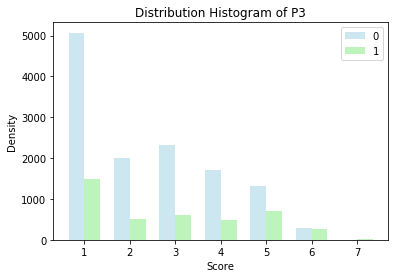

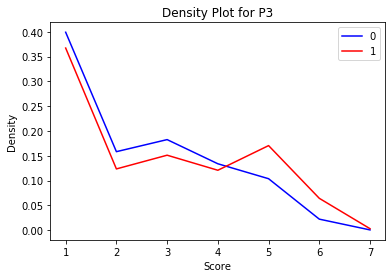

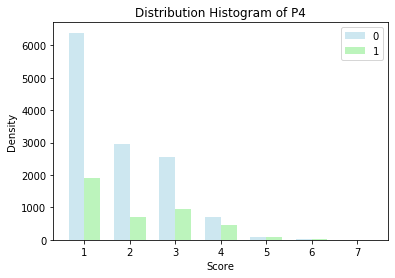

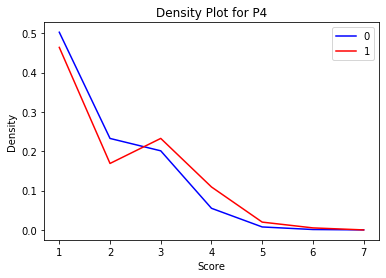

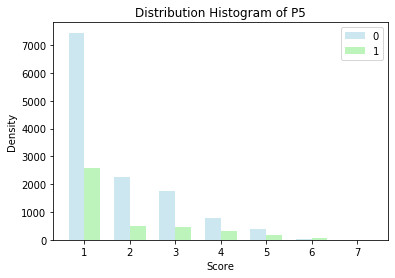

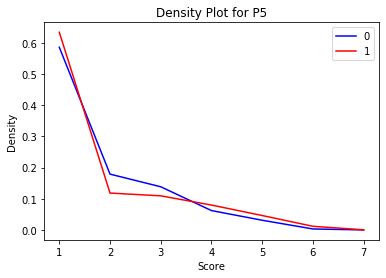

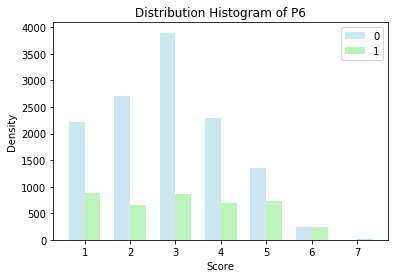

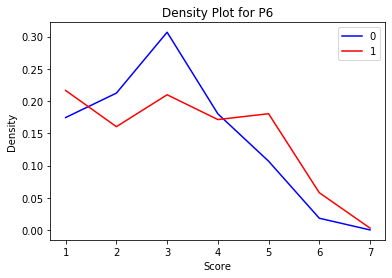

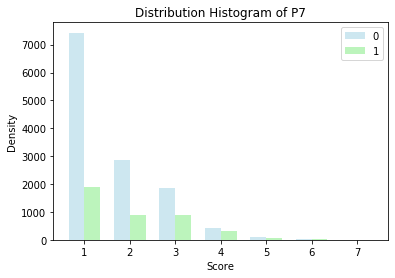

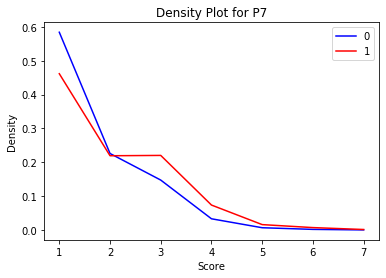

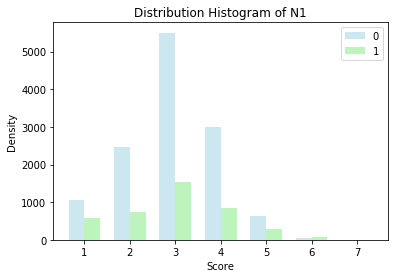

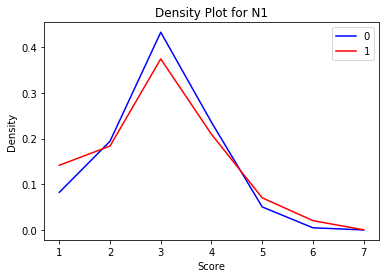

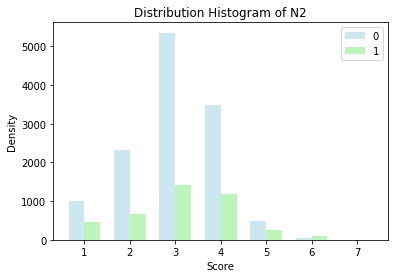

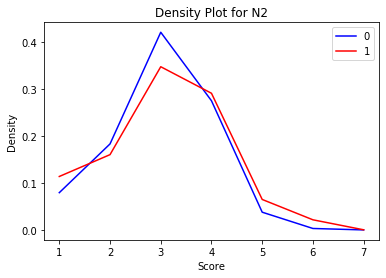

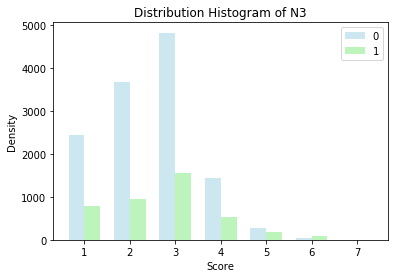

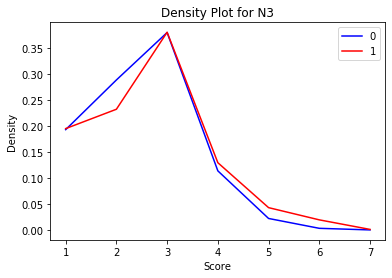

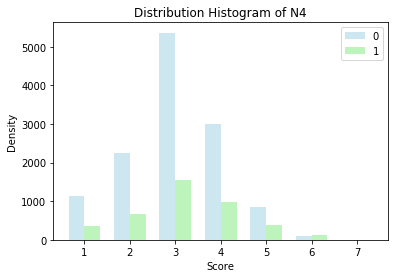

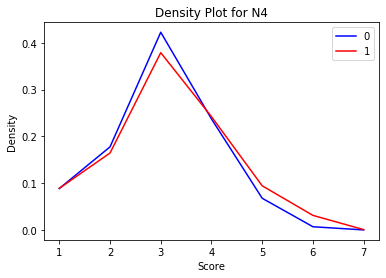

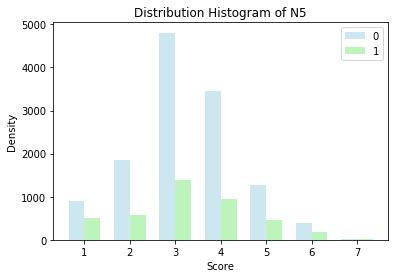

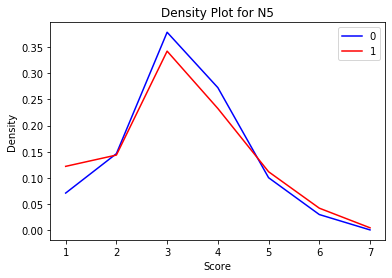

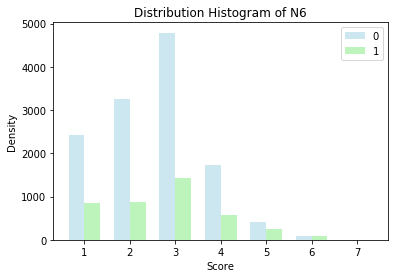

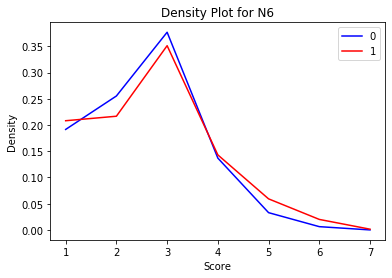

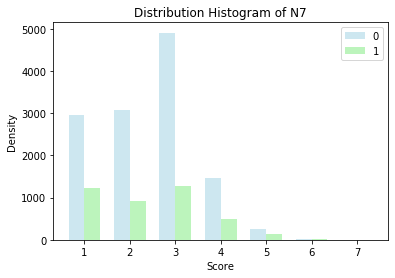

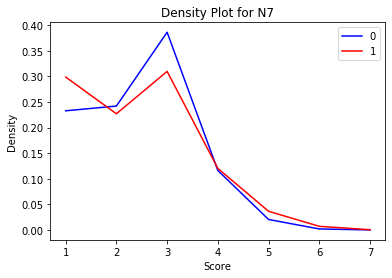

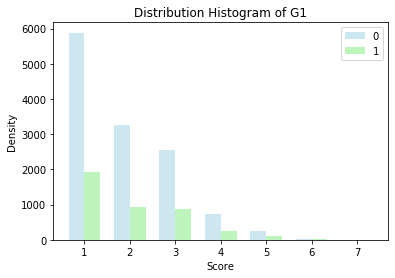

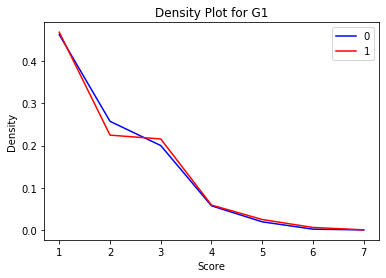

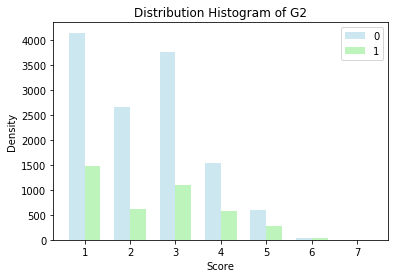

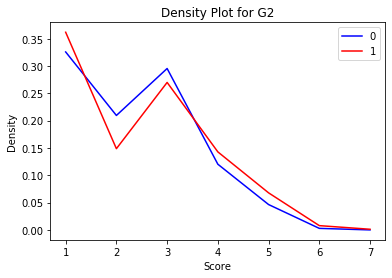

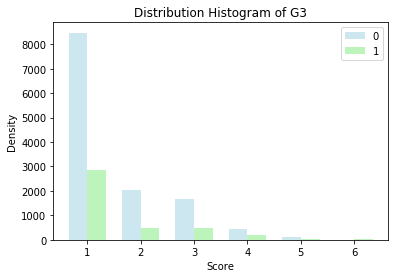

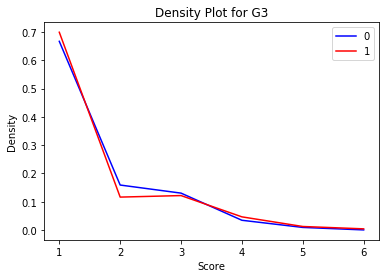

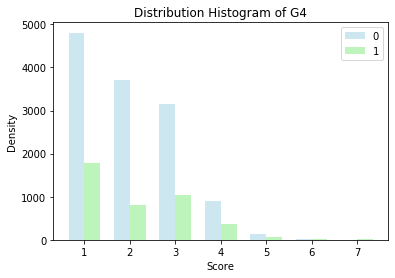

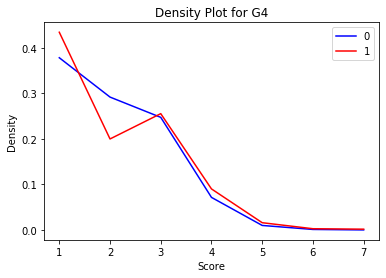

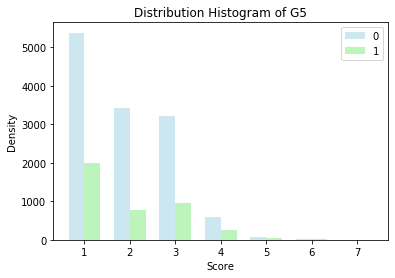

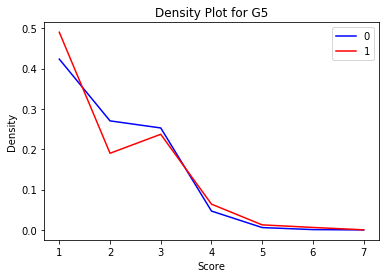

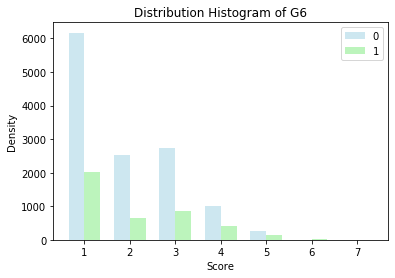

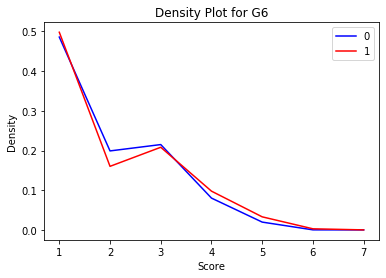

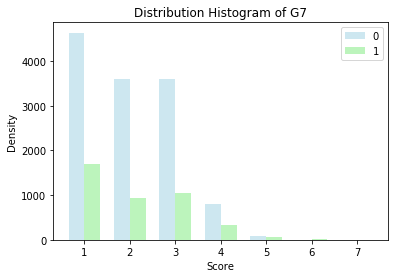

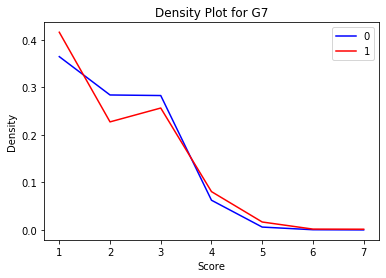

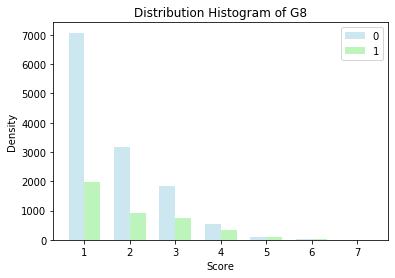

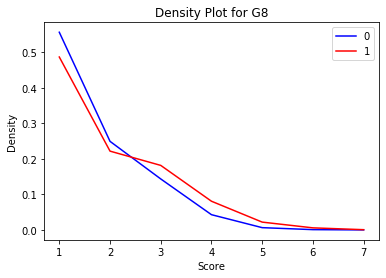

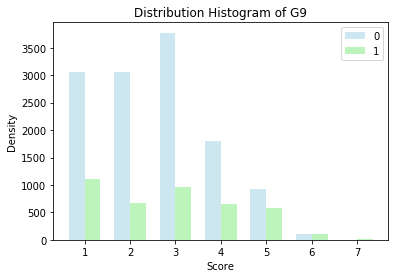

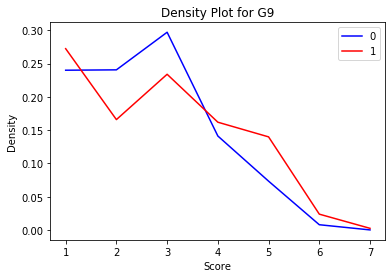

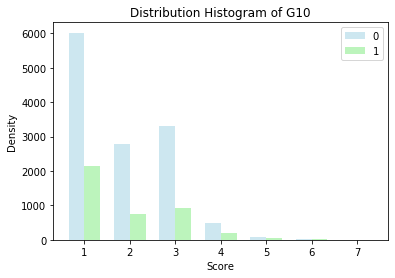

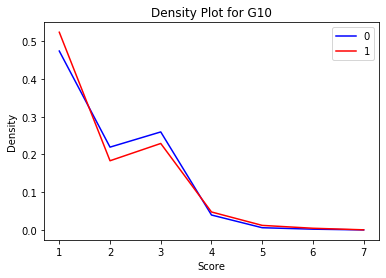

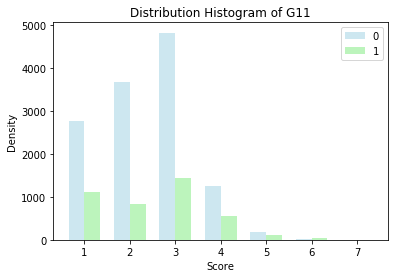

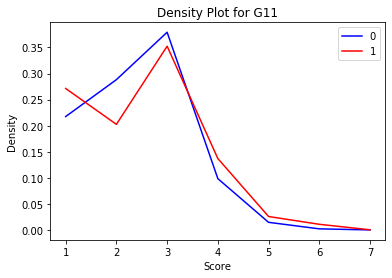

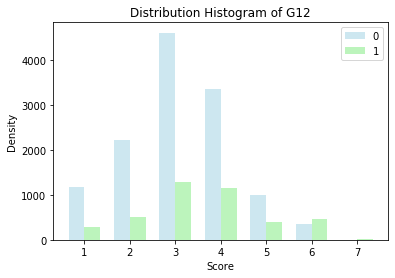

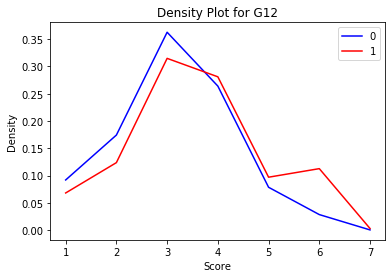

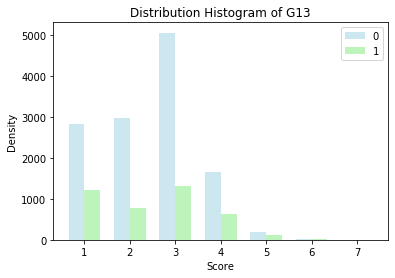

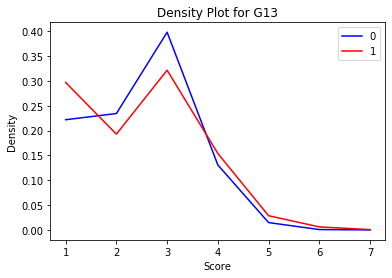

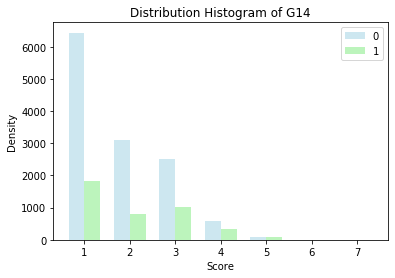

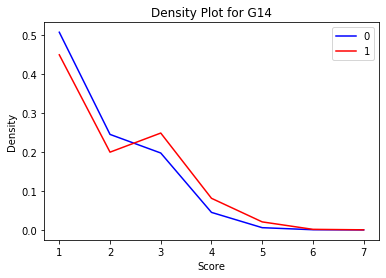

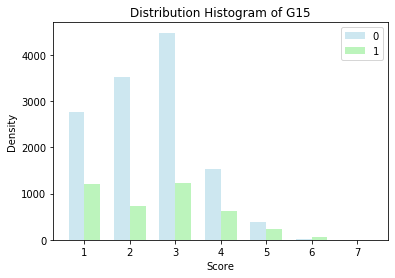

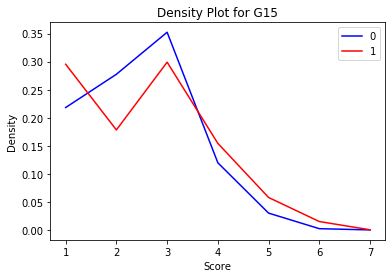

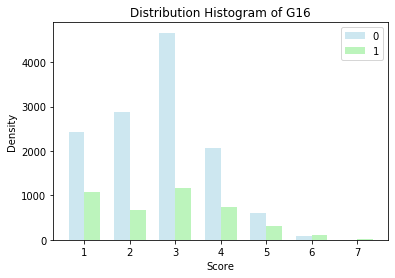

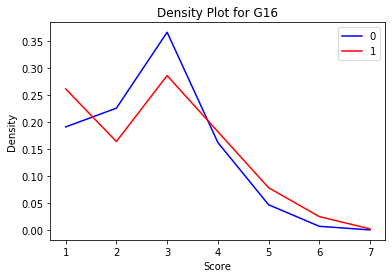

In [11]:
for feature in cols[8:38]:
    feature_distribution_bar(train,feature)
    freq_polygon(train,feature)

### Trend of PANSS_total, Positive Scale, Negative Scale and General Psychopathology Scale for patients

In [12]:
def get_trend_patient(db, patients_ids = None, pass_trend = True, txGroup = None):
    cols = db.columns
    patients_db = db.copy()
    if txGroup:
        patients_db = patients_db[patients_db['TxGroup'] == txGroup]
    if patients_ids:
        patients_db = db[db['PatientID'].isin(patients_ids)]
    if pass_trend:
        patients_db = patients_db[patients_db.LeadStatus == 0]
    p_list = np.sum(patients_db.groupby('binnedVisitDay').mean().dropna()[cols[8:15]], axis = 1)
    n_list = np.sum(patients_db.groupby('binnedVisitDay').mean().dropna()[cols[15:22]], axis = 1)
    g_list = np.sum(patients_db.groupby('binnedVisitDay').mean().dropna()[cols[22:38]], axis = 1)
    c_list = np.sort(patients_db['binnedVisitDay'].unique())
    total = patients_db.groupby('binnedVisitDay').mean().dropna()['PANSS_Total']
    
    fig, ax = plt.subplots()
    ax.plot(c_list, p_list, label="Positive Scale")
    ax.plot(c_list, n_list, label="Negative Scale")
    ax.plot(c_list, g_list, label="General Scale")
    ax.plot(c_list, total, label="Total Scale")
    ax.legend(loc='best')
    ax.set_xlabel('binnedVisit Day')
    ax.set_ylabel('Score')
    return None

In [13]:
def get_trend_patient_all(db, patients_ids = None, pass_trend = True, txGroup = None):
    cols = db.columns
    patients_db = db.copy()
    if txGroup:
        patients_db = patients_db[patients_db['TxGroup'] == txGroup]
    if patients_ids:
        patients_db = db[db['PatientID'].isin(patients_ids)]
    if pass_trend:
        patients_db = patients_db[patients_db.LeadStatus == 0]
    c_list = np.sort(patients_db['binnedVisitDay'].unique())
    
    fig, ax = plt.subplots()
    for i in range(8,38):
        ax.plot(c_list, patients_db.groupby('binnedVisitDay').mean().dropna()[cols[i]],label = cols[i])
    ax.legend(loc='best')
    ax.set_xlabel('binnedVisit Day')
    ax.set_ylabel('Score')
    return None

Below is the trend for all patients. As shown in graphs, Positive Scale, Negative Scale and General Psychopathology Scale have a decreasing trend when VisitDay increases

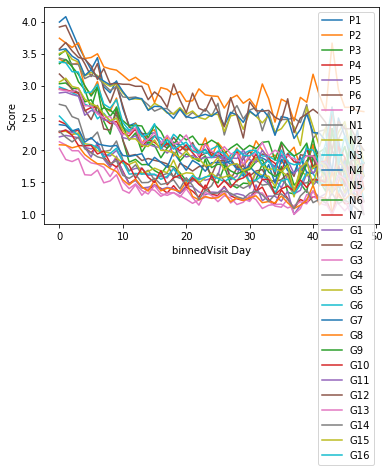

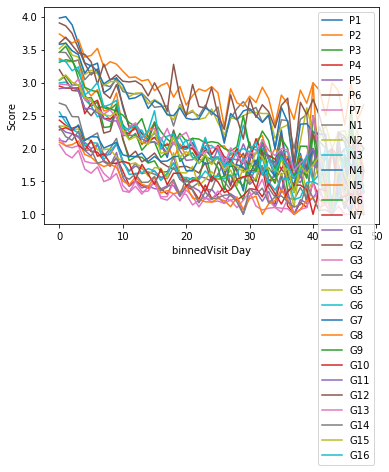

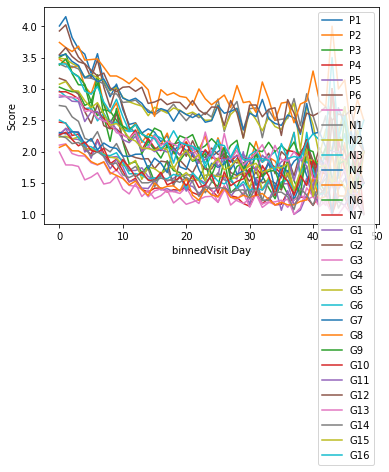

In [14]:
get_trend_patient_all(train)
get_trend_patient_all(train, txGroup='Treatment')
get_trend_patient_all(train, txGroup='Control')

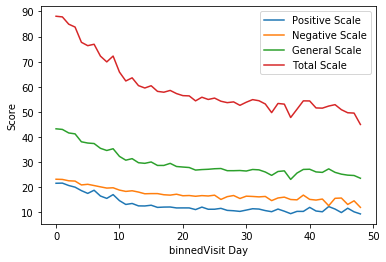

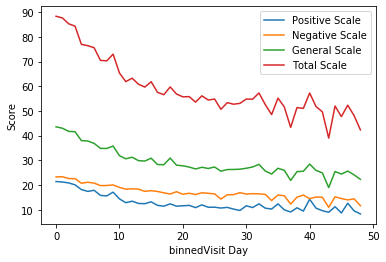

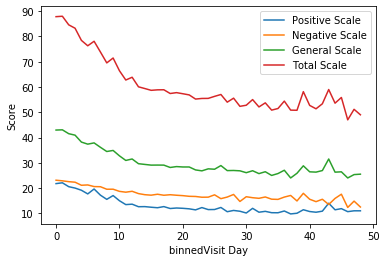

In [15]:
get_trend_patient(train)
get_trend_patient(train,txGroup='Treatment')
get_trend_patient(train,txGroup='Control')

See trend for one patient:

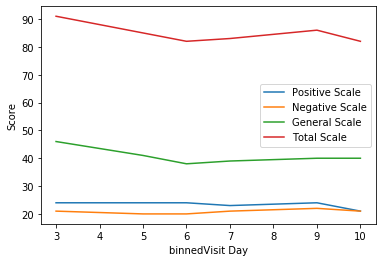

In [16]:
get_trend_patient(train,patients_ids=[10276])

### Visualize Probability of LeadStatus being 1 (flagged/ Assign to CS) for different features:

In [17]:
def plot_column_pos_prob(db, column):
    fig, ax = plt.subplots(figsize=(15,6))
    db.groupby(column).mean()['LeadStatus'].plot.bar()
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),2), (p.get_x() * 1.005, p.get_height() * 1.005))
    ax.set_title(column)


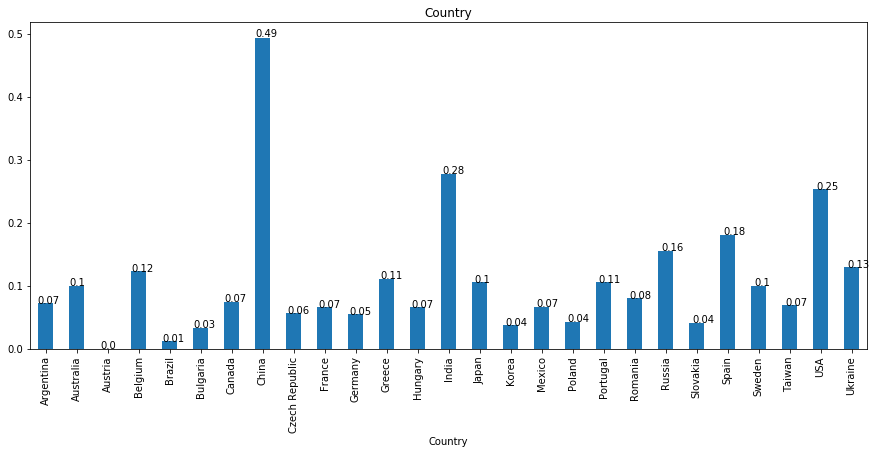

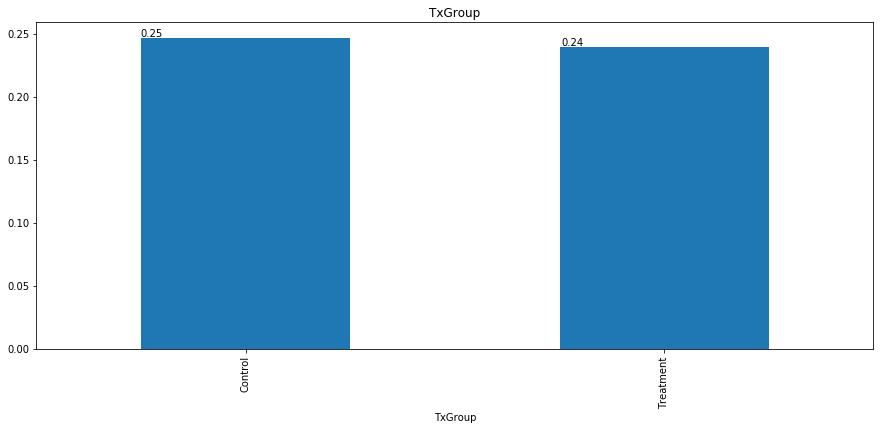

In [20]:
plot_column_pos_prob(train,"Country")
plot_column_pos_prob(train,'TxGroup')
# plot_column_pass_rate(train, "Study")
# plot_column_pass_rate(train, "PANSS_Total")

In [21]:
train_val = train[train['LeadStatus'] == 0]
cols = list(train_val.columns)

In [22]:
cluster_val = train_val[cols[7:38]]

In [23]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [24]:
scalers = {}
for col in cluster_val.columns:
    scaler = preprocessing.MinMaxScaler().fit(cluster_val[col].values.reshape(-1,1))
    scalers[col] = scaler
    cluster_val[col] = scaler.transform(cluster_val[col].values.reshape(-1,1))

/Users/lujiankun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lujiankun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/lujiankun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
sse = []
for i in range(3,30):
    km = KMeans(n_clusters=i)
    km.fit(cluster_val)
    sse.append(km.inertia_)

In [ ]:
plt.plot(list(range(3,30)), sse, '-o')

In [25]:
km = KMeans(n_clusters=8)
cluster_val_y = km.fit_predict(cluster_val)

In [26]:
cluster_val.head()

,VisitDay,P1,P2,P3,P4,P5,P6,P7,N1,N2,...,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16
0,0.0000,0.8333,0.8000,0.6667,0.3333,0.6667,0.6667,0.0000,0.6000,0.6000,...,0.4000,0.0000,0.6667,0.0000,0.4000,0.3333,0.0000,0.0000,0.6000,0.2000
1,0.0083,0.6667,0.8000,0.8333,0.5000,0.5000,0.6667,0.0000,0.4000,0.2000,...,0.0000,0.0000,0.8333,0.0000,0.2000,0.3333,0.5000,0.0000,0.4000,0.2000
2,0.0229,0.5000,0.6000,0.5000,0.0000,0.5000,0.3333,0.0000,0.6000,0.4000,...,0.0000,0.0000,0.8333,0.0000,0.4000,0.3333,0.0000,0.0000,0.4000,0.2000
3,0.0333,0.5000,0.4000,0.5000,0.1667,0.5000,0.3333,0.0000,0.4000,0.4000,...,0.0000,0.0000,0.6667,0.0000,0.0000,0.3333,0.0000,0.0000,0.4000,0.0000
5,0.0958,0.6667,0.6000,0.5000,0.0000,0.3333,0.3333,0.0000,0.8000,0.4000,...,0.4000,0.1667,0.5000,0.0000,0.4000,0.1667,0.0000,0.0000,0.6000,0.2000


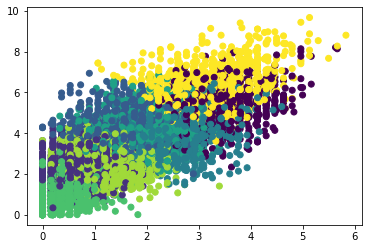

In [28]:
plt.scatter(np.sum(cluster_val.iloc[:,1:8],axis=1).values, np.sum(cluster_val.iloc[:,16:31].values,axis=1), c=cluster_val_y)